# Bonus Example

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

This Python script imports essential libraries and modules for data analysis, preprocessing, machine learning, and model evaluation using the Wine dataset.

# Data Handling and Visualization:

numpy and pandas are used for numerical operations and handling tabular data.

matplotlib.pyplot and seaborn are included for visualization, allowing users to plot distributions, feature relationships, and classification results.

# Dataset and Preprocessing:

load_wine from sklearn.datasets loads the Wine dataset, a well-known classification dataset containing chemical properties of wines.

train_test_split is used to split the dataset into training and testing sets.

StandardScaler ensures all features have a mean of 0 and variance of 1, improving the performance of machine learning models.

# Dimensionality Reduction:

PCA (Principal Component Analysis) reduces the dataset’s dimensions while retaining the most important features, aiding in visualization and computation efficiency.

# Machine Learning Models:

RandomForestClassifier is an ensemble learning method using multiple decision trees to improve classification accuracy.

SVC (Support Vector Classifier) is a robust support vector machine (SVM) implementation for classification tasks.

GridSearchCV helps optimize model parameters through cross-validation, ensuring the best configuration for SVM.

# Performance Evaluation:

accuracy_score calculates the overall accuracy of predictions.

classification_report provides precision, recall, and F1-score for each class.

confusion_matrix helps visualize model performance by showing correctly and incorrectly classified instances.

In [ ]:
# Load dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

This code loads the Wine dataset from sklearn.datasets and converts it into a Pandas DataFrame for easier manipulation and analysis.

# Loading the Dataset:

load_wine() loads the Wine dataset, which contains 13 numerical features representing different chemical properties of wines (e.g., alcohol content, magnesium, flavonoids).

The dataset also includes a target variable (data.target), which classifies each wine sample into one of three classes (0, 1, or 2), representing different wine types.

# Creating a DataFrame:

pd.DataFrame(data.data, columns=data.feature_names) converts the dataset into a structured Pandas DataFrame, making it easier to analyze and visualize.

df['target'] = data.target adds the target labels as a new column, allowing us to associate each sample with its respective wine class.

This structured approach enables efficient data exploration, preprocessing, and modeling, forming the foundation for machine learning applications.

In [ ]:
# Data exploration
print(df.describe())
print("\nClass Distribution:")
print(df['target'].value_counts())

This code performs an initial exploratory data analysis (EDA) on the Wine dataset by summarizing its statistical properties and examining the class distribution.

# Descriptive Statistics:

df.describe() generates key statistical summaries for all numerical features in the dataset.

It includes metrics such as mean, standard deviation (std), minimum, maximum, and quartiles (25%, 50%, 75%) for each feature.

This helps identify data trends, ranges, and potential outliers.

# Class Distribution:

df['target'].value_counts() counts the number of samples in each wine class (0, 1, or 2).

This check is important to understand whether the dataset is balanced or imbalanced, which may affect model performance.

By analyzing this output, we gain insights into the dataset’s structure, enabling better preprocessing, feature selection, and model training strategies.

In [ ]:
# Data preprocessing
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This code performs data preprocessing to prepare the Wine dataset for machine learning modeling by separating features and target variables, followed by scaling the features.

# Feature and Target Separation:

    X = df.drop(columns=['target'])
creates a feature matrix (X) by removing the target column from the DataFrame. This leaves the numerical features that describe the chemical properties of the wines.

    y = df['target']
extracts the target variable (y), which contains the class labels (wine types) corresponding to each sample.

# Feature Scaling:

    scaler = StandardScaler()
initializes a StandardScaler object, which is used to normalize the features.

    X_scaled = scaler.fit_transform(X)
applies the scaling transformation to the feature matrix X, standardizing the features such that they have zero mean and unit variance. This is particularly important for models like SVMs or neural networks, which perform better when the data is normalized.

Scaling the data ensures that each feature contributes equally to the model and prevents any feature with a larger range from dominating the learning process.

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

This code splits the preprocessed dataset into training and testing sets, which is a crucial step in evaluating the performance of machine learning models.

# Splitting the Data:

    train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

divides the scaled feature matrix X_scaled and the target labels y into two subsets:

80% of the data is used for training the model (X_train, y_train).

20% of the data is reserved for testing and evaluating the model (X_test, y_test).

# Stratified Sampling:

    stratify=y
ensures that the class distribution in both the training and testing sets is proportional to the original distribution in the full dataset. This is especially important in case of class imbalances, as it ensures the model is trained and evaluated on data that represents the original class distribution.

# Random Seed:

    random_state=42
ensures that the split is reproducible, meaning the same data split will be generated every time the code is run, which is essential for consistency in experiments.

This process helps in creating a robust model evaluation setup, where the model is trained on one portion of the data and tested on another, ensuring that the performance metrics are reliable and not biased.

In [ ]:
# Feature importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_importances)

This code calculates the feature importance using a Random Forest classifier, which helps identify which features have the most influence on the model's predictions.

# Training the Random Forest Classifier:

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
initializes a Random Forest classifier with 100 trees (n_estimators=100) and a fixed random seed (random_state=42) to ensure reproducibility.

    rf.fit(X_train, y_train)
trains the Random Forest model on the training data (X_train, y_train), where X_train contains the scaled features and y_train contains the corresponding target labels.

# Extracting Feature Importance:

    feature_importances = pd.Series(rf.feature_importances_, index=data.feature_names)
retrieves the importance scores for each feature from the trained Random Forest model. The feature_importances_ attribute provides a score for each feature, indicating its contribution to the model's decisions.

    pd.Series(...).sort_values(ascending=False)

converts these scores into a Pandas Series and sorts them in descending order, allowing us to easily identify the most important features.

# Displaying Feature Importance:

    print("\nFeature Importance:\n", feature_importances)

prints the sorted feature importance scores, providing insights into which features (e.g., alcohol, magnesium, flavonoids) are the most influential in classifying the wine types.

This step is useful for understanding the relative significance of each feature in making predictions, which can inform feature selection and model interpretation.

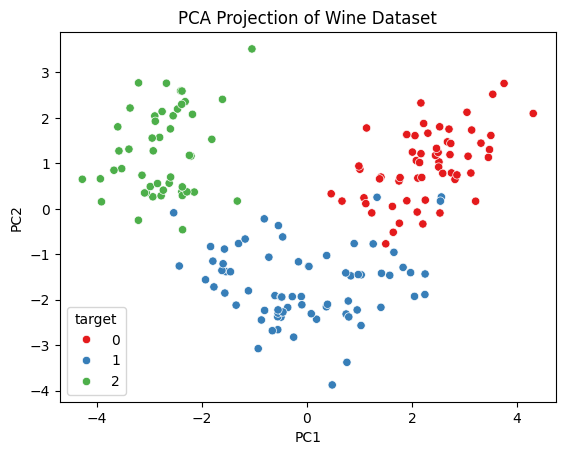

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='Set1')
plt.title('PCA Projection of Wine Dataset')
plt.show()

This code applies Principal Component Analysis (PCA) for dimensionality reduction to visualize the Wine dataset in a two-dimensional space.

# PCA Initialization and Transformation:

    pca = PCA(n_components=2)

initializes a PCA object that will reduce the data to two principal components (PC1 and PC2). PCA is a technique used to reduce the number of features in a dataset while retaining as much variance (information) as possible.

    X_pca = pca.fit_transform(X_scaled)
applies the PCA transformation to the scaled feature matrix (X_scaled), transforming the original high-dimensional data into a 2D representation. The resulting X_pca contains the projections of the data onto the first two principal components.

# Creating a DataFrame for PCA Results:

# df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

creates a new Pandas DataFrame with the two principal components (PC1 and PC2) as columns.

    df_pca['target'] = y

adds the target variable (wine classes) to the PCA DataFrame, allowing for visualization of the data with respect to its class labels.

# Visualization:

    sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='Set1')

uses Seaborn to create a scatter plot, where the x and y axes represent the two principal components (PC1 and PC2), and the points are color-coded based on the wine class (target).

    plt.title('PCA Projection of Wine Dataset')

adds a title to the plot, and plt.show() displays the scatter plot.

This visualization provides a 2D projection of the high-dimensional Wine dataset, helping to understand the structure and separation of different wine classes based on their chemical features. PCA reduces complexity while retaining key patterns in the data, aiding in data exploration and modeling.

In [ ]:
# Model training and comparison
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', C=1.0, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

This code trains and evaluates two different machine learning models—Random Forest and Support Vector Machine (SVM)—and compares their performance on the Wine dataset.

# Model Initialization:

The models dictionary defines the two models to be evaluated:

"Random Forest" uses a RandomForestClassifier with 100 trees (n_estimators=100), providing an ensemble approach to classification.

"SVM" uses a Support Vector Classifier (SVC) with a linear kernel and a regularization parameter C=1.0, aiming to find the optimal decision boundary for class separation.

# Training and Evaluation Loop:

for name, model in models.items(): iterates through the dictionary of models, training and evaluating each one.

model.fit(X_train, y_train) trains each model on the training data (X_train and y_train).

y_pred = model.predict(X_test) generates predictions on the test set (X_test) using the trained model.

# Performance Metrics:

The performance of each model is evaluated using several metrics:

Accuracy: accuracy_score(y_test, y_pred) computes the percentage of correct predictions made by the model.

Classification Report: classification_report(y_test, y_pred) provides a detailed evaluation of precision, recall, F1-score, and support for each class, offering deeper insights into model performance.

Confusion Matrix: confusion_matrix(y_test, y_pred) displays a matrix showing how many samples were correctly or incorrectly classified, helping identify specific misclassifications.

By comparing the performance of both models on the Wine dataset, this approach allows us to assess which model provides better classification accuracy and generalization on unseen data, helping make an informed decision about which model to choose for deployment

In [ ]:
# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("\nBest SVM Parameters:", grid_search.best_params_)
print("Best SVM Accuracy:", grid_search.best_score_)

This code performs hyperparameter tuning for a Support Vector Machine (SVM) using GridSearchCV, aiming to find the best combination of hyperparameters that optimize the model's performance.

# Hyperparameter Grid:

    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
defines a grid of possible hyperparameters to be tested. Specifically, it explores different values for:

The regularization parameter (C), which controls the trade-off between achieving a low error on the training set and ensuring a simpler model (lower values favor simplicity, while higher values allow more flexibility).

The kernel type (kernel), which defines the function used to map data into a higher-dimensional space. The code tests both the linear kernel and the Radial Basis Function (RBF) kernel.

# Grid Search Setup:

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy') initializes a GridSearchCV object, specifying:

SVC() as the model to be tuned.

param_grid as the set of hyperparameters to explore.

cv=5, meaning 5-fold cross-validation will be used to evaluate the model's performance for each hyperparameter combination. This ensures robust model evaluation.

scoring='accuracy' to use accuracy as the metric for evaluating model performance.

# Model Fitting and Evaluation:

grid_search.fit(X_train, y_train) performs the grid search on the training data (X_train, y_train), fitting the SVM model for each combination of hyperparameters and evaluating its performance via cross-validation.

Output the Best Parameters and Accuracy:
# New Section
print("\nBest SVM Parameters:", grid_search.best_params_) outputs the best combination of hyperparameters found during the search.

print("Best SVM Accuracy:", grid_search.best_score_) prints the highest accuracy achieved by the model using the best hyperparameter combination.

By using GridSearchCV, this code ensures that the most optimal set of hyperparameters for the SVM is selected, potentially improving the model's performance.

In [ ]:
!pip install tensorflow

The command !pip install tensorflow is used to install TensorFlow, an open-source machine learning framework, into the current environment.

# TensorFlow Installation:

!pip is a command to execute Python's package manager (pip) directly in the shell (often used in Jupyter notebooks or environments where shell commands are allowed).

install tensorflow instructs pip to download and install the TensorFlow library, which provides a comprehensive set of tools for building and deploying machine learning models, particularly in the areas of deep learning and neural networks.

# Why TensorFlow:

TensorFlow is widely used in the research and production environments for developing deep learning models. It supports a wide range of applications from natural language processing (NLP) and computer vision to reinforcement learning, making it a versatile tool for AI development.

After running this command, TensorFlow will be available for import and use in Python, allowing users to build and train machine learning models efficiently.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer

This code imports several components needed for building and training a neural network model using TensorFlow and Keras, along with tools for preprocessing categorical data.

# TensorFlow Import:

import tensorflow as tf imports the TensorFlow library, which is widely used for creating and training machine learning models, particularly deep learning models. TensorFlow provides various functionalities, including model creation, optimization, and deployment.

# Keras Model Import:

from tensorflow.keras.models import Sequential imports the Sequential model from Keras, which is a high-level API for building neural networks in TensorFlow. The Sequential model allows you to stack layers of neurons in a linear fashion, making it suitable for simple feedforward neural networks.

# Keras Layer Import:

from tensorflow.keras.layers import Dense imports the Dense layer from Keras, which is a fully connected layer of neurons. The Dense layer is the most commonly used layer in fully connected neural networks, where each neuron in the layer is connected to every neuron in the previous layer. It requires defining the number of neurons and an activation function.

# Label Binarizer Import:

from sklearn.preprocessing import LabelBinarizer imports LabelBinarizer from scikit-learn. The LabelBinarizer is used to convert categorical labels (like class names or target variables) into a binary format, such as one-hot encoding. This is particularly useful when dealing with multi-class classification problems, as it transforms labels into a format suitable for neural network training.


In [ ]:
# ANN Model
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you want to use the same train-test split as before
X_train_ann, X_test_ann, y_train_ann, y_test_ann = X_train, X_test, y_train, y_test

# One-hot encode the target variables
y_train_ann = tf.keras.utils.to_categorical(y_train_ann, num_classes=3)
y_test_ann = tf.keras.utils.to_categorical(y_test_ann, num_classes=3)

# Train ANN Model
ann_model.fit(X_train_ann, y_train_ann, epochs=50, batch_size=8, validation_data=(X_test_ann, y_test_ann), verbose=1)

# Evaluate ANN Model
y_pred_ann = ann_model.predict(X_test_ann)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)
y_test_ann_classes = np.argmax(y_test_ann, axis=1)

print("\nANN Model Performance:")
print("Accuracy:", accuracy_score(y_test_ann_classes, y_pred_ann_classes))
print("Classification Report:\n", classification_report(y_test_ann_classes, y_pred_ann_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_ann_classes, y_pred_ann_classes))

# Line 1-6

This code defines an Artificial Neural Network (ANN) model using Keras' Sequential API, specifying its architecture and layer configurations.

# Model Initialization:

ann_model = Sequential([...]) initializes a Sequential model, meaning the layers are stacked one after the other, forming a linear sequence of computations.

# First Layer (Input Layer):

Dense(32, activation='relu', input_shape=(X_train.shape[1],)) defines a Dense layer with 32 neurons. The input_shape=(X_train.shape[1],) specifies the shape of the input data, where X_train.shape[1] represents the number of features in the training set (each feature corresponds to an input neuron).

The activation function used here is ReLU (Rectified Linear Unit), which introduces non-linearity to the model and helps it learn complex patterns. ReLU is commonly used in hidden layers because it performs well in deep networks.

# Second Layer (Hidden Layer):

Dense(16, activation='relu') adds another Dense layer with 16 neurons, again using the ReLU activation function. This layer introduces additional complexity and helps the model learn more abstract features.

# Third Layer (Output Layer):

Dense(3, activation='softmax') defines the output layer with 3 neurons, corresponding to the 3 classes in the classification problem (as indicated by the Wine dataset having 3 target classes). The softmax activation function is used here because it converts the output of each neuron into a probability distribution over the classes, ensuring the model outputs values between 0 and 1 that sum to 1, making it suitable for multi-class classification.

In summary, the ANN model consists of two hidden layers with 32 and 16 neurons, respectively, using ReLU activation, and an output layer with 3 neurons using softmax activation to perform multi-class classification. This architecture is suitable for the Wine classification task, where the model predicts which of the three wine classes a given input belongs to.


# Line 8:

The code ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) configures the training settings for the Artificial Neural Network (ANN) model by specifying the optimizer, loss function, and evaluation metrics.

# Optimizer (optimizer='adam'):

The optimizer defines how the weights of the model are updated during training to minimize the loss function.

Adam (Adaptive Moment Estimation) is used here, which is an efficient and widely used optimizer in deep learning. It combines the advantages of two other optimizers—AdaGrad and RMSProp—by adapting the learning rate based on the first and second moments of the gradients. Adam helps the model converge faster and more effectively, especially in complex neural networks.

# Loss Function (loss='categorical_crossentropy'):

The loss function defines the objective the model is trying to minimize during training.

Categorical Cross-Entropy is used for multi-class classification tasks. It measures the difference between the true class labels and the predicted probabilities (output by the softmax activation in the output layer). The goal is to minimize this loss, which means improving the accuracy of the class predictions.

# Metrics (metrics=['accuracy']):

The metrics argument specifies which metrics to monitor during training.

Accuracy is chosen here, which is the most common metric for classification tasks. It measures the percentage of correct predictions made by the model, providing an overall sense of model performance.

Overall, Line 8 prepares the ANN model for training by using the Adam optimizer to adjust the weights, categorical cross-entropy as the loss function for multi-class classification, and accuracy as the metric to track the model’s performance during training.

# Line 11:

The code X_train_ann, X_test_ann, y_train_ann, y_test_ann = X_train, X_test, y_train, y_test essentially creates identical copies of the original training and testing datasets (X_train, X_test, y_train, y_test) and assigns them to new variables specifically for use in the ANN model.

X_train_ann and X_test_ann are the feature matrices (input data) for training and testing the ANN model. They hold the scaled and preprocessed feature data that the neural network will learn from and test on.

y_train_ann and y_test_ann are the target labels (class labels) for training and testing, representing the true classes the model is trying to predict.

This step might be used for clarity or to distinguish data used specifically for training the ANN model from other potential models or preprocessing steps, but it does not alter the data in any way. The data for the ANN model is exactly the same as the original X_train, X_test, y_train, and y_test.

# Line 14 and 15:

The code y_train_ann = tf.keras.utils.to_categorical(y_train_ann, num_classes=3) and y_test_ann = tf.keras.utils.to_categorical(y_test_ann, num_classes=3) converts the class labels (y_train_ann and y_test_ann) into one-hot encoded vectors.

One-Hot Encoding: For each label in the target array (y_train_ann and y_test_ann), it transforms the labels into a binary vector where only the index corresponding to the class is 1, and all other positions are 0.

num_classes=3 specifies that the target data has 3 distinct classes (as in the wine dataset, where there are 3 types of wine).

This transformation is required for multi-class classification problems, as it allows the neural network to predict probabilities for each class and compares them with the one-hot encoded labels during training.

# Line 18:

The code ann_model.fit(X_train_ann, y_train_ann, epochs=50, batch_size=8, validation_data=(X_test_ann, y_test_ann), verbose=1) trains the Artificial Neural Network (ANN) model on the training data for 50 epochs with the following settings:

X_train_ann, y_train_ann: These are the feature matrix and target labels for training the model.

epochs=50: The model will go through the entire training dataset 50 times during training. Each pass through the data is called an epoch.

batch_size=8: The model will update its weights after processing 8 training samples in each mini-batch. Smaller batch sizes often result in better generalization but may take longer to train.

validation_data=(X_test_ann, y_test_ann): This specifies the validation dataset (X_test_ann and y_test_ann). The model will evaluate its performance on this data after each epoch to monitor overfitting and generalization.

verbose=1: This setting prints the progress of training, including the loss and accuracy after each epoch, so you can track the model's performance.

This function is crucial for fitting the model to the data and adjusting its weights during training.

# Line 21, 22 and 23:

The code:

y_pred_ann = ann_model.predict(X_test_ann):

This line generates predictions (y_pred_ann) for the test dataset (X_test_ann) using the trained ANN model. The model outputs a probability distribution for each class (since the output layer uses softmax activation).

y_pred_ann_classes = np.argmax(y_pred_ann, axis=1):

np.argmax(y_pred_ann, axis=1) converts the predicted probabilities into class labels by selecting the class with the highest probability for each sample. This gives the final predicted class for each test sample.

y_test_ann_classes = np.argmax(y_test_ann, axis=1):

This line does the same transformation for the true labels (y_test_ann), which were one-hot encoded during preprocessing. It converts the one-hot encoded labels back to the original class labels, so they can be compared with the model's predictions.

Line 21, 22 and 23 predict the class probabilities for the test set, convert those probabilities into class labels, and also convert the one-hot encoded true labels into class labels for evaluation purposes.